## Tests

### C. Souvent variance empirique varie

Soit $Y$ une variable aléatoire à valeur dans $\mathbb{R}$ et densité de probabilité $\rho$, de moyenne $\mu = \int_\mathbb{R} Y\rho(Y)dY$ et de variance $\sigma^2 = \int_{\mathbb{R}} (Y-\mu)^2\rho(Y)dY$ __inconnus__ d'un expérimentateur.

TODOC.1 Étant donné une moyenne $\mu$ et une variance $\sigma$, compléter la fonction créant une fonction anonyme dont l'évaluation sans argument donne des réalisations d'une variable aléatoire de votre choix de moyenne $\mu$ et variance $\sigma$.

In [40]:
from typing import *
import random
import math

def create_random_variable_of_given_average_and_variance(an_average:float,a_variance:float)->Callable[[],float]:
    def f():
        sign = {0:-1,1:1}[random.randint(0,1)]
        return an_average+ sign*math.sqrt(a_variance)
    return f

In [41]:
true_average = 1.2
true_variance = 2.3
generator = create_random_variable_of_given_average_and_variance(true_average,true_variance)
experimentations = [generator() for _ in range(10)]
print(experimentations)

[2.71657508881031, -0.31657508881031005, -0.31657508881031005, 2.71657508881031, -0.31657508881031005, -0.31657508881031005, 2.71657508881031, 2.71657508881031, -0.31657508881031005, -0.31657508881031005]


L'expérimentateur a accès à $(Y_i)_{i=1,\ldots n}$, à savoir $n$ réalisations de cette variable supposée identiquement distribué (à la mesure de probabilité de $Y$) indépendant.
(Une façon de briser l'indépendance est d'observer ces $(Y_i)_i$ après un tri en ordre croissant)

Pour estimer la moyenne, il utilise l'estimateur empirique $$\hat{Y} := \frac{1}{n}\sum_{i=1}^n Y_i.$$

Cet estimateur n'est pas biaisée car $E[\hat{Y}-\mu] = \frac{1}{n}\sum_{i=1} E[Y_i-\mu] = \frac{1}{n}\sum_{i=1}\int(Y-Y_i)\rho(Y)dY =  0$ car la différence de deux réalisation $Y$ et $Y_i$ sous la même loi est d'espérance nulle donc $\int(Y-Y_i)dY = 0$.

In [42]:
from statcoin import average

Pour estimer la variance, si il connaissait la moyenne $\mu$ il aurait pu utiliser le premier estimateur
$$ \hat{S_{|\mu}^2} = \frac{1}{n} \sum_{i=1}^n (Y_i-\mu)^2.$$

Cependant nous supposons qu'il ne connait pas $\mu$ donc il en est réduit à utiliser la moyenne empirique comme valeur de $\mu$, ce qui le même au second estimateur empirique $$ \hat{S}^2 := \frac{1}{n}\sum_{i=1}^n(Y_i-\hat{Y})^2.$$



Cependant de part la définition de $\hat{Y}$ et les $(Y_i)_i$ ne sont pas (linéairement) indépendants en particulier le dernier terme de la somme satisfait
$$ (Y_n-\hat{Y})^2=(n\hat{Y}-\sum_{i=1}^{n-1}Y_i)^2 = f(Y,Y_1,\ldots Y_{n-1}).$$

TODO C.2 A partir de $m$ expérimentations d'au plus $N$ réalisations de variable. Tracez les esperances empiriques de $E[S_{\mu}^2]$ et $E[\hat{S}^2]$ après $n \leq N$ réalisations.

In [43]:
def variance_estimator_given_average(realisations:List[float],an_average:float)->float:
    return (1/n)*sum((realisations[i]- an_average)**2 for i in range(len(realisations)))

def first_variance_estimator_without_average(realisations:List[float])->float:
    return variance_estimator_given_average(realisations,average(realisations))

In [44]:
N = 100
m = 100
realisations = [ [generator() for _ in range(N)] for _ in range(m)]

In [45]:
variance_averages = {}
variance_empirical_averages = {}
for n in range(2,N):
    variance_averages[n] = average([variance_estimator_given_average(realisations[k][:n],true_average)\
                                    for k in range(m)])
    variance_empirical_averages[n] = average(\
            [first_variance_estimator_without_average(realisations[k][:n])\
                                    for k in range(m)])

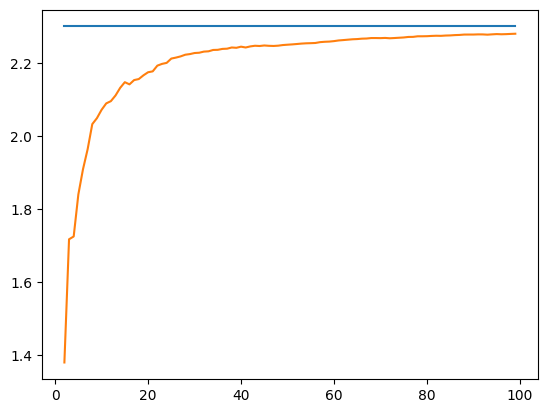

In [46]:
import matplotlib.pyplot as plt

ns = list(variance_averages.keys())
ys = [ variance_averages[n] for n in variance_averages]
zs = [ variance_empirical_averages[n] for n in variance_empirical_averages]

plt.plot(ns,ys)
plt.plot(ns,zs)
plt.show()

TODO C.3 Ajoutez la courbe $n \longrightarrow \frac{n-1}{n}\sigma^2$. Que pensez vous de cette indication ?

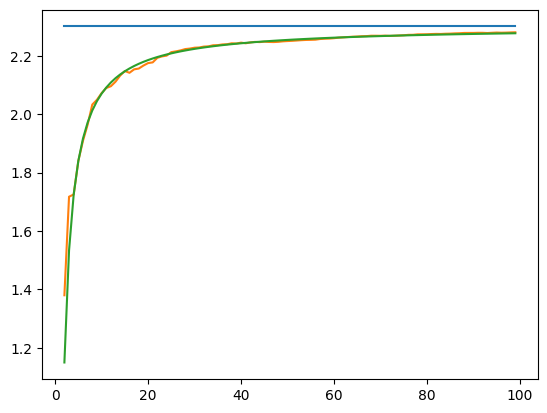

In [47]:
xs =  [(n-1)/n*true_variance for n in ns]


plt.plot(ns,ys)
plt.plot(ns,zs)
plt.plot(ns,xs)
plt.show()


On conjecture de cette expérimentation que l'estimateur sans la vraie moyenne est biaisée.

Le troisième estimateur:

$$ \hat{S'} := \frac{1}{n-1}\sum_{i=1}^n(Y_i-\hat{Y})^2 $$

(qui compte bien $n$ termes et non $n-1$ comme indiqué par erreur dans la première séance.)

TODO C.4 Notez les éléments de preuves du biais de $\hat{S}^2$ menant à la version non-biaisé $\hat{S'}^2$.

Plus de détails ici:
https://en.wikipedia.org/wiki/Bessel%27s_correction

et même un plaidoyer pour ignorer cette discussion:

https://imstat.org/2015/11/17/the-kids-are-alright-divide-by-n-when-estimating-variance/

### Définition de la $p$-value.

Soit $H_0$ une hypothèse statistique permettant de faire des calculs probabilistes.

Exemple de $H_0$: Nous observons la somme de $n$ lancers indépendant d'une pièce de biais $p$ connu donnant donc $1$ avec probabilité $p$ et $0$ avec probabilité $1-p$.

Sous cette hypothèse, la probabilité que la somme des lancers soit $k$ est donc ${n \choose k}p^k(1-p)^k$.

Supposons que l'expérience donne la somme $S$ pour les $n$ lancers.

__Définition partielle__: La __$p$-value__ de ce résultat $S$ est la probabilité d'obtenir un résultat au moins aussi extrème que $S$ sous l'hypothèse $H_0$.

Cette notion de résultat extrème est encore à préciser. 

Sur l'exemple il y a au moins trois variantes pour qualifier un autre résultat $S'$ d'au moins aussi extrème que le résultat $S$:
- pour un test d'un seul coté sur la queue (de distribution) droite: $S'\geq S$, donc dans ce cas la $p$-value est la probabilité $\sum_{k \geq S}{n \choose k}p^k(1-p)^k$,
- pour un test d'un seul coté sur la queue (de distribution) gauche: $S' \leq S$, donc dans ce cas la $p$-value est la probabilité $\sum_{k\leq S}{n \choose k}p^k(1-p)^k$,
- pour un test à deux cotés $|S'-np| \geq |S-np|$ dans ce cas la $p$-value est $2\min\left(\mathsf{Proba}(S'\leq S),\mathsf{Proba}(S'\geq S)\right)$ qui sont toute deux calculées ci-dessus.

Plus généralement, on se donne un ensemble $W$ de résultats qualifiés d'extrèmes de l'expérience permettant de rejeter l'hypothèse $H_0$.

Soit $S \in \mathcal{S}$ un résultat possible de l'expérience.
Supposons disposer d'une "distance" $d(S,\overline{S})$ au résultat le plus probable $\overline{S}$.


__Définition moins partielle__: La $p$-value du resultat $S$ est $\mathsf{Proba}(d(S',\overline{S}) \geq d(S,\overline{S}) | H_0)$, autrement dit la probabilité que sous $H_0$ le résultat soit au moins aussi extrème que $S$. 


On voit que la $p$-value dépends de ce qui a été planifié sous $H_0$ et de la définition de la notion d'extrème.

### X. Exemple d'expérience de durées variables.

(traduction modifiée de https://en.wikipedia.org/wiki/P-value )

Nous voulons tester si une pièce est équilibrée (notre $H_0$) à l'aide du protocole suivant:

- Si les deux premiers lancers sont égaux, arrêter l'expérience.
- Sinon faire quatre lancers de plus.

TODOX.1: Lister tout les résultats possible de l'expérience en ne considérant que les __nombres__ de pile ou face obtenus.

Les 7 résultats possibles sont :
    2F 0P,
    0P 2F,
    1F 5P,
    5F 1P,
    2F 4P,
    4F 2P,
    3F 3P

Nous observons trois fois pile et trois fois face.

TODOX.2: Utiliser la statistique $|\mbox{nb pile}|/|\mbox{ nb face}|$ pour calculer les $p$-values pour un seul coté sur la queue droite, puis gauche, puis un test à deux cotés.

TODOX.3: Au lieu du ratio, nous utilisons les probabilités de chaque résultat de l'expérience. Les résultats plus extrèmes qu'un résultat $S$ sont ceux de probabilité au plus égal à celle de $S$. Calculez sous ce modèle d'extrème la $p$-value.

TODOX.4: Devons nous modifier la page wikipedia ? 


TODOX.5: Modifier le protocole en arrêtant après deux lancers uniquement si ils sont distincts. Reprendre les calculs.

(nb_pile,nb_face):       Statistique        Proba

    (1,1)                     1              1/2
    (6,0)                    +oo               
    (5,1)                     5
    (4,2)                     2
    (3,3)                     1
    (2,4)                     1/2
    (1,5)                     1/5
    (0,6)                     0

Laissé pour le DM à la maison.

### Y. Analyse d'un médicament pour la grippe

Notre objectif est de savoir si un nouveau médicament contre la grippe est efficace pour réduire la durée de la maladie.

TODOY.1 Récupérer les fonctions __time_length_flue_with_drug__ et __time_length_flue_without_drug__ depuis la matrice. Lire leur documentation.

In [48]:
from the_matrix import time_length_flue_without_drug,time_length_flue_with_drug

In [49]:
help(time_length_flue_without_drug)

Help on function time_length_flue_without_drug in module the_matrix:

time_length_flue_without_drug()
    number of days of a flue without drug (or placebo)



In [50]:
help(time_length_flue_with_drug)

Help on function time_length_flue_with_drug in module the_matrix:

time_length_flue_with_drug()
    number of days of a flue with drug



TODOY.2 Completer la fonction __simulate_cohort__ qui renvoit la durée de la grippe pour __nb_patients__ patient selon le traitement passé sous forme de fonction. Par défaut dans cette étude, les cohortes sont formées de $25$ patients. Utiliser cette fonction pour simuler une cohorte sans traitement et une cohorte avec traitement.

In [51]:
from typing import *

def simulate_cohort(nb_patients:int,treatement:Callable[[],float])->List[float]:
    return [treatement() for i in range(nb_patients)]

In [52]:
nb_patients_per_cohort = 25
a_cohort_with_drug = simulate_cohort(nb_patients_per_cohort,time_length_flue_with_drug)
a_cohort_without_drug = simulate_cohort(nb_patients_per_cohort,time_length_flue_without_drug)
print(f'cohort with drug {a_cohort_with_drug}')
print(f'cohort without drug {a_cohort_without_drug}')

cohort with drug [4, 7, 22, 3, 2, 23, 11, 7, 4, 5, 4, 1, 24, 16, 4, 10, 11, 8, 3, 5, 4, 7, 7, 22, 8]
cohort without drug [12, 5, 1, 7, 9, 6, 6, 6, 6, 3, 30, 4, 3, 4, 21, 17, 9, 22, 4, 8, 7, 19, 8, 4, 12]


TODOY.3 Une cohorte est réduite à une estimation de la durée représentative du traitement. Récupérez la fonction pour la moyenne dans le module __statcoin__ qui recopie des éléments de vos notebooks précédents et implémentez le calcul de la médiane par la fonction __median__ dont le type vous est donné.

In [53]:
from statcoin import average

In [54]:
from typing import *
from copy import deepcopy

def median(floats:List[float])->float:
    L = deepcopy(floats)
    L.sort()
    return L[len(L)//2]

TODOY.4 Les estimateurs __average__ et __median__ sont "idem pas pareil", plus sérieusement il résume à un nombre de jour la durée typique de la grippe pour une cohorte mais de façon différentes. Pour vous en rendre compte, générer une centaines de cohortes sans traitement et tracés les points de coordonnées $(average(c),median(c))$ pour chaque cohorte $c$ en utilisant la fonction __.scatter__ de __matplotlib.pyplot__. Une fois le programme mise au point, jouez sur le nombre de cohortes et le nombre de patients par cohorte et commentez.

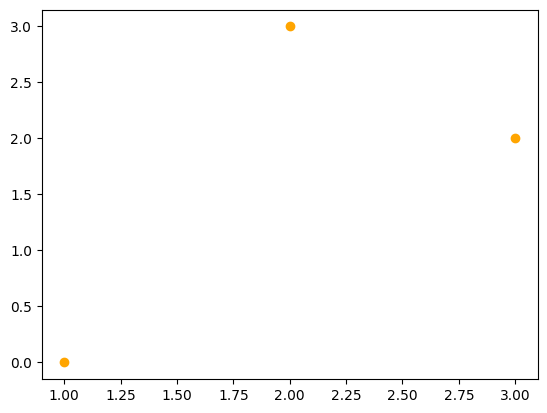

In [55]:
# demo élementaire de l'utilisation de matplotlib.pyplot.scatter
import matplotlib.pyplot as plt

xs = [1,2,3]
ys = [0,3,2]
plt.scatter(xs,ys,marker='o',c='orange')
plt.show()

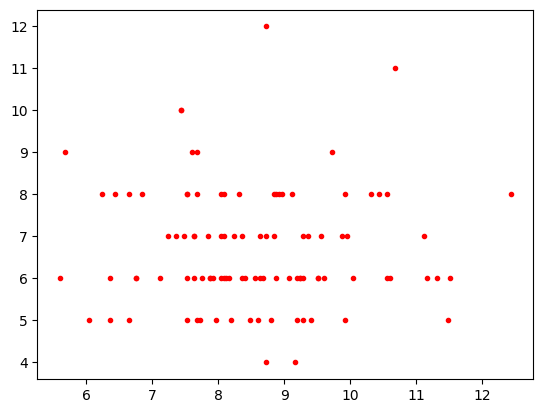

In [56]:
nb_patients_per_cohort = 25
nb_cohorts_sousH0 = 100

cohorte_sous_H0 = [simulate_cohort(nb_patients_per_cohort,time_length_flue_without_drug) for i in range(nb_cohorts_sousH0)]
data_average = [average(simulate_cohort(nb_patients_per_cohort,time_length_flue_without_drug)) for i in range(nb_cohorts_sousH0)]
data_median = [median(simulate_cohort(nb_patients_per_cohort,time_length_flue_without_drug)) for i in range(nb_cohorts_sousH0)]
plt.scatter(data_average,data_median,marker='.',c='red')
plt.show()

Commentaire: On observe que pour une certaine valeure du median, plusieurs valeurs de la moyenne sont possibles. Si les deux estimateurs étaient pareils, on aurait obtenu des points répartis de manière quasi linéaire.

Notre hypothèse $H_0$ est que le médicament n'a aucun effet et donc qu'il se comporte comme le placebo, pour lequel nous avons de nombreuses données car des cohortes ont été accumulées pour tester d'autres médicaments.
Comme notre but est de savoir si le médicament réduit la durée de la grippe, nous allons utiliser pour chaque estimateur, qui est monodimensionel, un test sur la queue de distribution gauche: $\mathsf{Proba}\left((\mathsf{estimateur}(S') \leq \mathsf{estimateur}(S)|H_0\right)$ pour estimer la $p$-value du  résultat $S$ d'une cohorte avec le médicament.
Remarquez que cette $p$-value dépends de l'estimateur choisi (ici la moyenne ou la médianne).
En pratique la probabilité sous $H_0$ de la valeur de chaque estimateur n'est pas connue.
Nous allons nous appuyer sur la fréquence d'apparition et donc la fréquence d'apparition cumulée pour approcher cette distribution $H_0$.
Justement à la question précédente nous avons généré de nombreuses cohortes sous le placebo que nous allons utiliser pour evaluer empiriquement la $p$-value.

TODOY.5 Étant donné $\mathsf{estimateur}(c) \mbox{for $c$ in $cohortes$}$ et $e := \mathsf{estimateur(c)}$ comment connaitre la $p$-value "empirique" de $e$ ? Indication: c'est bien plus simple que prévu. Seconde indication pour l'optimisation facultative __help(list.index)__. Compléter ensuite la fonction calculant la $p$-value empirique. Puis générez une cohorte sous traitement et calculer la $p$-value empirique selon les deux estimateur moyenne et médianne et tester la signifiance au seuil $\frac{1}{20}$. Faite plusieurs essais avec le médicaments et commentez les résultats.

Il suffit de sélectionner les estimations inférieures à $e$, de les compter et de diviser par le nombre total de cohortes. 

In [57]:
def empirical_p_value(cohortes_under_H0:List[List[float]],estimator:Callable[[List[float]],float],\
                     empirical_cohorte)->float:
    e = estimator(empirical_cohorte)
    return len([c for c in cohortes_under_H0 if estimator(c) <= e])/len(cohortes_under_H0)

In [58]:
cohorte_with_drug = simulate_cohort(nb_patients_per_cohort,time_length_flue_with_drug)
print(empirical_p_value(cohorte_sous_H0,average,cohorte_with_drug))
print(empirical_p_value(cohorte_sous_H0,median,cohorte_with_drug))

0.01
0.09


In [59]:
significative_p_value = 1/20
nb_cohort_with_drug = 100

print("average","median")
significance = {'average_results':0,'median_results':0}
for i in range(nb_cohort_with_drug):
    cohort_with_drug = simulate_cohort(nb_patients_per_cohort,time_length_flue_with_drug)
    average_pval = empirical_p_value(cohorte_sous_H0, average, cohort_with_drug)
    median_pval = empirical_p_value(cohorte_sous_H0, median, cohort_with_drug)
    if (average_pval < significative_p_value):
        significance['average_results'] += 1
    elif (median_pval < significative_p_value):
        significative_p_value['median_results'] += 1
print(significance)

##Correction
# results = {(sign_with_average, sign_with_median): 0\
#           for sign_with_average in [True,False] for sign_with_median in [True,False]}
# for _ in range(nb_cohort_with_drug) :
#     cohort_with_drug = simulate_cohort(nb_patients_per_cohort, time_length_flue_with_drug)
#     sign_with_average = empirical_p_value(cohorte_sous_H0, average, cohort_with_drug) <= significative_p_value
#     sign_with_median = empirical_p_value(cohorte_sous_H0, median, cohort_with_drug) <= significative_p_value
#     results[(sign_with_average, sign_with_median)] += 1
    
# print(results)

average median
{'average_results': 32, 'median_results': 0}


On observe que sur un grand nombre de cohortes sous médicaments, l'utilisation de l'estimateur average permet de statistiquement rejeter $H_0$ alors que cela n'est pas possible en utilisant l'estimateur median. Ainsi le type d'estimateur influence les résultats.

Nous constatons que le choix de l'estimateur à une forte influence sur le résultat du test.

TODOY.6 Sélectionner les cohortes sous $H_0$ qui sont significativement extrèmes pour:
- la moyenne et la médiane (violet)
- la moyenne mais pas la médiane (bleu)
- la médiane mais pas la moyenne (rouge)
- aucun estimateur (jaune).

Dessiner chaque type de points $(average(c),median(c))$ sous $H_0$ de la couleur indiquée en utilisant __.scatter__

In [60]:
def extreme_avg_med_cohort(cohorte_sous_H0,nb_cohorts_sousH0,nb_of_cohorts):
    assert(nb_of_cohorts <= nb_cohorts_sousH0)
    extreme_cohorts = []
    for cohort in cohorte_sous_H0:
        pvalue_av = empirical_p_value(cohorte_sous_H0,average,cohort)
        pvalue_med = empirical_p_value(cohorte_sous_H0,median,cohort)
        d = abs(pvalue_av - pvalue_med)
        extreme_cohorts.append((cohort,d))
    extreme_cohorts.sort(key = lambda x:x[1])
    extreme_cohorts = extreme_cohorts[nb_cohorts_sousH0 - nb_of_cohorts -1:-1]
    return [extreme_cohorts[i][0] for i in range(nb_of_cohorts)]

def extreme_avg_cohort(cohorte_sous_H0,nb_cohorts_sousH0,nb_of_cohorts):
    assert(nb_of_cohorts <= nb_cohorts_sousH0)
    extreme_cohorts = []
    n = len(cohorte_sous_H0[0])
    for cohort in cohorte_sous_H0:
        pvalue_av = empirical_p_value(cohorte_sous_H0,average,cohort)
        extreme_cohorts.append((cohort,pvalue_av))
    extreme_cohorts.sort(key = lambda x: x[1])
    extreme_cohorts = extreme_cohorts[:nb_of_cohorts]
    return [extreme_cohorts[i][0] for i in range(nb_of_cohorts)]

def extreme_med_cohort(cohorte_sous_H0,nb_cohorts_sousH0,nb_of_cohorts):
    assert(nb_of_cohorts <= nb_cohorts_sousH0)
    extreme_cohorts = []
    n = len(cohorte_sous_H0[0])
    for cohort in cohorte_sous_H0:
        pvalue_med = empirical_p_value(cohorte_sous_H0,median,cohort)
        extreme_cohorts.append((cohort,pvalue_med))
    extreme_cohorts.sort(key = lambda x: x[1])
    extreme_cohorts = extreme_cohorts[:nb_of_cohorts]
    return [extreme_cohorts[i][0] for i in range(nb_of_cohorts)]

def balanced_cohort(cohorte_sous_H0,nb_cohorts_sousH0,nb_of_cohorts):
    assert(nb_of_cohorts <= nb_cohorts_sousH0)
    extreme_cohorts = []
    for cohort in cohorte_sous_H0:
        pvalue_av = empirical_p_value(cohorte_sous_H0,average,cohort)
        pvalue_med = empirical_p_value(cohorte_sous_H0,median,cohort)
        d = abs(pvalue_av - pvalue_med)
        extreme_cohorts.append((cohort,d))
    extreme_cohorts.sort(key = lambda x:x[1])
    extreme_cohorts = extreme_cohorts[:nb_of_cohorts]
    return [extreme_cohorts[i][0] for i in range(nb_of_cohorts)]

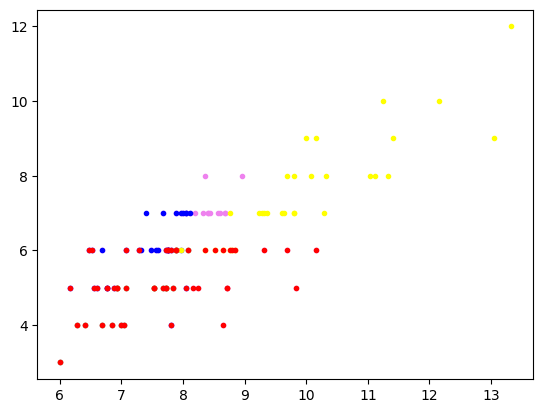

In [61]:
nb_of_cohort_per_distribution = 50
violet_cohorts = extreme_avg_med_cohort(cohorte_sous_H0,nb_cohorts_sousH0,nb_of_cohort_per_distribution)
blue_cohorts = extreme_avg_cohort(cohorte_sous_H0,nb_cohorts_sousH0,nb_of_cohort_per_distribution)
yellow_cohorts = balanced_cohort(cohorte_sous_H0,nb_cohorts_sousH0,nb_of_cohort_per_distribution)
red_cohorts = extreme_med_cohort(cohorte_sous_H0,nb_cohorts_sousH0,nb_of_cohort_per_distribution)

plt.scatter([average(violet_cohorts[i]) for i in range(len(violet_cohorts))],\
            [median(violet_cohorts[i]) for i in range(len(violet_cohorts))],marker='.',c='violet')
plt.scatter([average(blue_cohorts[i]) for i in range(len(blue_cohorts))],\
            [median(blue_cohorts[i]) for i in range(len(blue_cohorts))],marker='.',c='blue')
plt.scatter([average(yellow_cohorts[i]) for i in range(len(yellow_cohorts))],\
            [median(yellow_cohorts[i]) for i in range(len(yellow_cohorts))],marker='.',c='yellow')
plt.scatter([average(red_cohorts[i]) for i in range(len(red_cohorts))],\
            [median(red_cohorts[i]) for i in range(len(red_cohorts))],marker='.',c='red')
plt.show()

TODOY.7 Factoriser votre code de TODOY.6 dans la fonction ci-dessous, sauf pour le __plt.show()__ final. Vous pouvez le faire en deux temps: d'abord en commençant votre fonction par 

__(average,median) = estimator_pair__

Pour les plus motivé (c'est optionnel) anonymiser les estimateurs en les plaçant dans une liste et en leur laissant la possibilité d'être deux ou trois. Indication: dans la seconde version vous pouvez utiliser le module __itertools__ et en particulier la fonction __.product__. Il existe une version 3d de __.scatter__ qu'idéalement nous pourrions utiliser.

In [62]:
def scatter_bi_estimor_partition(cohortes:List[List[float]],\
                                 estimator_pair:Tuple[Callable[[List[float]],float]])->None:
    extreme_avg_med_cohort(cohortes,len(cohortes),nb_of_cohort_per_distribution)
    extreme_avg_cohort(cohortes,len(cohortes),nb_of_cohort_per_distribution)
    extreme_med_cohort(cohortes,len(cohortes),nb_of_cohort_per_distribution)
    balanced_cohort(cohortes,len(cohortes),nb_of_cohort_per_distribution)
    
    violet_cohorts = extreme_avg_med_cohort(cohorte_sous_H0,nb_cohorts_sousH0,nb_of_cohort_per_distribution)
    blue_cohorts = extreme_avg_cohort(cohorte_sous_H0,nb_cohorts_sousH0,nb_of_cohort_per_distribution)
    yellow_cohorts = balanced_cohort(cohorte_sous_H0,nb_cohorts_sousH0,nb_of_cohort_per_distribution)
    red_cohorts = extreme_med_cohort(cohorte_sous_H0,nb_cohorts_sousH0,nb_of_cohort_per_distribution)

    plt.scatter([estimator_pair[0](violet_cohorts[i]) for i in range(len(violet_cohorts))],\
                [estimator_pair[1](violet_cohorts[i]) for i in range(len(violet_cohorts))],marker='.',c='violet')
    plt.scatter([estimator_pair[0](blue_cohorts[i]) for i in range(len(blue_cohorts))],\
                [estimator_pair[1](blue_cohorts[i]) for i in range(len(blue_cohorts))],marker='.',c='blue')
    plt.scatter([estimator_pair[0](yellow_cohorts[i]) for i in range(len(yellow_cohorts))],\
                [estimator_pair[1](yellow_cohorts[i]) for i in range(len(yellow_cohorts))],marker='.',c='yellow')
    plt.scatter([estimator_pair[0](red_cohorts[i]) for i in range(len(red_cohorts))],\
                [estimator_pair[1](red_cohorts[i]) for i in range(len(red_cohorts))],marker='.',c='red')

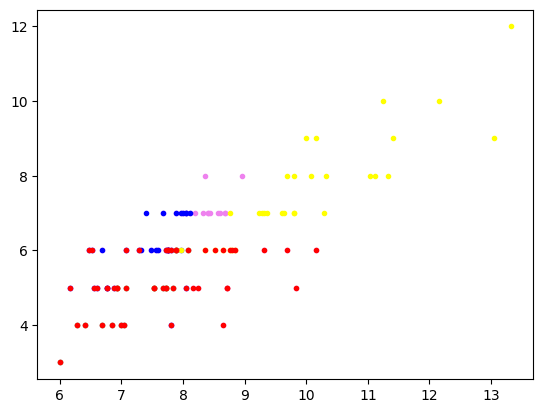

In [63]:
scatter_bi_estimor_partition(cohorte_sous_H0,(average,median))
plt.show()

In [64]:
import itertools

def scatter_estimators_partition(cohortes:List[List[float]],\
                                 estimators:List[Callable[[List[float]],float]])->None:
    assert(False)

In [65]:
scatter_estimators_partition(cohortes,[average,median])
plt.show()

NameError: name 'cohortes' is not defined

TODOY.8 Ajouter au dessin précédent (en vert), une vingtaine de points associés à des cohortes avec le médicament. Concluez. 

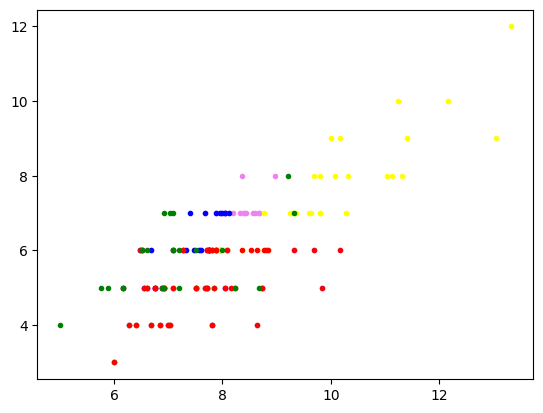

In [66]:
cohorts_with_drug = [simulate_cohort(nb_patients_per_cohort,time_length_flue_with_drug) for i in range(20)]
scatter_bi_estimor_partition(cohorte_sous_H0,(average,median))
averages,medians = [average(x) for x in cohorts_with_drug],[median(x) for x in cohorts_with_drug]
plt.scatter(averages,medians,marker='.',c = 'green')
plt.show()


Même si on voit que la performance moyenne des cohortes avec le médicament est meilleur, cela ne dépasse pas le seuil significatif.

### B. Choix de tests

Nous allons illustrer la conception de tests statistiques en s'appuyant sur un modèle simple de distribution de probabilité totalement discrétisé.

Fixons deux entiers positifs $n$ et $M$.
Considérons une variable aléatoire $X$ à valeur dans $[M] := \{0,\ldots M-1\}$ pour laquelle la probabilité de chaque $i\in[M]$ est $\mathsf{Proba}(X=i) = \frac{a_i}{n}$ avec $a_i$ un entier positif (ou nul). 

Si on interprète chaque fraction de probabilité $\frac{1}{n}$ comme une balle et chaque valeur possible $i\in[M]$ comme un casier, la loi de probabilité corresponds à la distribution de $a_i$ balles dans chaque casier $i$.
Ainsi une loi de probabilité peut être écrite par la suite/liste d'entiers positifs (ou nuls) $[a_i\mbox{ for i in range(M)}]$ telle que $\sum_i a_i = n$.

La réalisation de la variable aléatoire consiste donc à tirer une balle au hasard selon la mesure uniforme parmi les $n$ puis à retourner pour valeur de $X$ l'entier $i$ numérotant le casier qui le contient.

TODOB.1 Implémentez la fonction suivante qui tire aléatoirement une distribution aléatoire en ajoutant au hasard $n$ balles dans $M$ casiers.

In [ ]:
import random

def random_distribution(nb_balles:int,nb_casiers:int)->Tuple[int]:
    assert(False)

In [ ]:
nb_balles = 10
nb_casiers = 7
une_distribution = random_distribution(nb_balles,nb_casiers)
print(une_distribution)

TODOB.2 On suppose que les casiers sont alignés horizontalement en colonnes de balles. Ainsi la $y$-ième balle du casier $x$ corresponds à un point de coordonnée $(x,y)$. Implémentez la fonction qui a une distribution associe sont ensemble de points. Puis une autre qui dessine une distribution à l'aide de __.scatter__.

In [ ]:
def points_of_distribution(distribution:Tuple[int])->List[Tuple[int]]:
    assert(False)

In [ ]:
def scatter_distribution(distribution:Tuple[int],color='blue')->None:
    assert(False)

In [ ]:
scatter_distribution(une_distribution)
plt.show()

Supposons que notre hypothèse $H_0$ est que la variable $X$ est décrite par une telle distribution $d^0=(d^0_i)_{i\in [M]}\in \mathbb{N}^M$.

Nous cherchons un sous-ensemble dit de rejection $R \subseteq [M]$ car il permet de rejeter l'hypothèse $H_0$ si le résultat de l'expérience est dans $R$.

Notons $\overline{R} := [M]-R$ le complémentaire de $R$ dans $[M]$.

TODOB.3 Etant donné l'ensemble $R$, et la distribution $d^0 = (d^0_i)_{i\in [M]}$ quelle est la probabilité $\alpha$ d'un faux négatif (erreur de type 1) ? A t on en toute généralité pour une valeur $\alpha$ unicité de l'ensemble $R$ ?

À ce stade nous ne pouvons rien dire que la probabilité $\beta$ des faux positifs car nous n'avons aucune hypothèse lorsque $H_0$ n'est pas satisfait (hormis la faible information que c'est différent de $H_0$, cela pourrait par exemple être déterministe, ou bien les tirages non-indépendants...).  

Pour arriver à dire des choses très précise commençons par supposer que si $H_0$ n'est pas satisfaite, alors les données sont générés selon une distribution $d^a=(d^a_i)_{i\in[M]}$ une autre __hypothèse__ dite __alternative__ $H_a$ (avec pour seule contraintes $d^a \neq d^0$ mais le même $n$ et le même $M$). 

TODOB.4 Etant donné l'ensemble $R$ permettant de rejeter $H_0$, quelle est la probabilité $\beta$ d'accepter l'hypothèse $H_0$ alors que les données sont générées par $H_a$ ?

Pour tout ensemble $R$ nous pouvons donc calculer les probabilités $(\alpha,\beta)$ des erreurs de type I et II. 

TODOB.5 Implémentez la fonction qui calcule pour tout choix possible de $R$ cette distribution de paires $(\alpha(R),\beta(R))$, puis la seconde fonction qui teste tout les ensembles possibles sous forme de vecteur booleen indiquant l'appartenance de chaque casier à $R$ et renvoit un dictionnaire indexé par ces vecteurs et dont les valeurs sont les paires $(\alpha,\beta)$. Quelles sont les limites de votre seconde fonction ?

In [ ]:
def alpha_beta_from_rejection_set(d0:Tuple[int],da:Tuple[int],r:Set)->Tuple[float]:
    assert(False)
    
    
import itertools

def convert_boolean_vector_to_set(boolean_vector:Tuple[bool])->Set[int]:
    assert(False)
    
def alpha_beta_of_all_rejection_sets(d0:Tuple[int],da:Tuple[int])->Dict:
    assert(False)

In [ ]:
n = 10
m = 10
d0 = random_distribution(n,m)
while True:
    da = random_distribution(n,m)
    if da != d0:
        break
alpha_betas = alpha_beta_of_all_rejection_sets(d0,da)

TODOB.6 Dessiner à l'aide de __.scatter__ sous forme de nuage de points les $(\alpha(R),\beta(R))_{R \subset [M]}$. Discutez si un meilleur choix s'impose naturellement pour $R$ ? Pourquoi les paires $(\alpha=0,\beta=1)$ et $(\alpha=1,\beta=0)$ semblent toujours présentes ?